In [2]:
import numpy as np
import matplotlib.pyplot as plt

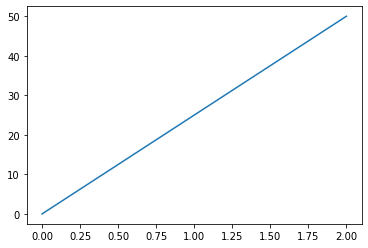

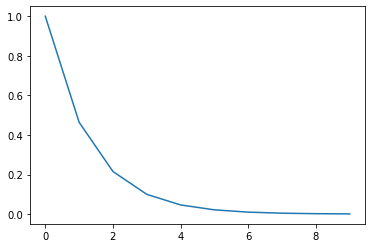

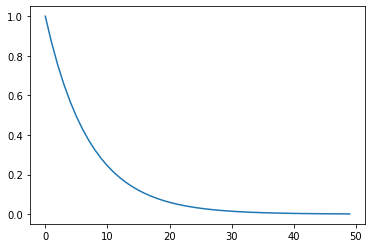

In [3]:
arr=np.array([
    [1,2,3],
    [4,2,8]
])

def describe(nda):
    print("Dimension:",nda.ndim)
    print("Shape",nda.shape)
    print("Type:",nda.dtype.name)
    print("Size:",nda.size)
    print()




arr=np.linspace(0,50,3)
plt.plot(arr)
plt.show()

arr=np.logspace(1,-2,10,base=10)/10

plt.plot(arr)
plt.show()
arr=np.geomspace(1,0.001,50)
plt.plot(arr)
plt.show()

In [5]:
def strassen(A, B):
    if type(A) is not np.ndarray or type(B) is not np.ndarray :
        raise Exception('Inputs are not numpy ndarrays')
    if A.ndim !=2 or B.ndim!=2:
        raise Exception('Inputs are not bidimensional')
    if A.shape[0]!=A.shape[1] or B.shape[0]!=B.shape[1]:
        raise Exception('Matrices are not squared')
    if not np.log2(A.shape[0]).is_integer():
        raise Exception('Matrices are not of n power of two')
    n = len(A)
    if n == 2:
        return A @ B
    h = n//2
    A11 =A[:h,:h]
    A12 =A[:h,h:n]
    A21 =A[h:n,:h]
    A22 = A[h:n,h:n]
    B11 = B[:h,:h]
    B12 = B[:h,h:n]
    B21 = B[h:n,:h]
    B22 =  B[h:n,h:n]
    M1 =strassen(A11+A22,B11+B22) # call strassen with corresponding matrices
    M2 = strassen(A21+A22,B11)# call strassen with corresponding matrices
    M3 =strassen(A11,B12-B22) # call strassen with corresponding matrices
    M4 = strassen(A22,B21-B11)# call strassen with corresponding matrices
    M5 = strassen(A11+A12,B22)# call strassen with corresponding matrices
    M6 =strassen(A21-A11,B11+B12) # call strassen with corresponding matrices
    M7 =strassen(A12-A22,B21+B22) # call strassen with corresponding matrices
    C=np.empty((n,n))
    C[:h,:h]=M1+M4-M5+M7
    C[:h,h:n]=M3+M5
    C[h:n,:h]=M2+M4
    C[h:n,h:n]=M1-M2+M3+M6
    # C = np.array([
    #     [M1+M4-M5+M7,M3+M5],
    #     [M2+M4,M1-M2+M3+M6]
    # ]).reshape(n,n)
    return C

size=2**8
A=np.random.randint(0,10,(size,size))
B=np.random.randint(0,10,(size,size))
C1=A @ B
C=strassen(A,B)
# print(C)
# print()
# print(C1)
# print()
print("MAE:",(np.abs(C1-C)).mean())



MAE: 0.0
